# Tick Strategy
### Team: Blue Horseshoe

In [82]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load our helper functios
import simtools as st
import tick as tk
from getstock import *
from simtools import *

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [83]:
# set up some variables
# NOTE: tickfile is a merged TAQ file!!!
tickfile = 'APPL-TAQ-Sep03.zip'
#test_day = '09/03/19'
taq = pd.read_pickle(tickfile)

In [84]:
taq.iloc[200000:300000,:]

# filter on date
#day = taq[test_day]

,exch,bid_px,bid_size,ask_px,ask_size,qu_cond,qu_seqnum,natbbo_ind,qu_cancel,qu_source,symbol,suffix_x,suffix_y,trade_size,trade_px
2019-09-03 09:51:06.172355425,K,206.56,1.0,206.68,2.0,R,2612405.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 09:51:06.172592265,C,206.57,1.0,217.14,1.0,R,2612408.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 09:51:06.175154421,Q,206.56,2.0,206.60,3.0,R,2612434.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 09:51:06.175242516,N,206.57,4.0,206.61,4.0,R,2612435.0,2.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 09:51:06.175310952,N,206.57,1.0,206.61,4.0,R,2612436.0,2.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 10:03:41.046196783,N,205.68,1.0,205.73,4.0,R,4037948.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 10:03:41.046295422,N,205.67,4.0,205.73,4.0,R,4037949.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 10:03:41.046340089,C,205.69,1.0,217.14,1.0,R,4037950.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 10:03:41.046347489,P,205.67,1.0,205.73,1.0,R,4037951.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN


## 1. Implement the Tick Strategy

In [110]:
# without the tick signal...
results = tk.algo_loop( taq.iloc[100000:200000,:] )

2019-10-29 01:16:35:729534: Beginning Tick Strategy run
Average stock spread for sample: 2.1311
2019-10-29 01:16:35:822096: starting main loop
2019-10-29 01:17:23:498068: end simulation loop
2019-10-29 01:17:23:498245: order analytics
2019-10-29 01:17:23:526553: Algo run complete.


In [111]:
results

,tick,fair_value,market_price,trade_price,avg_price,position,unrealized_pnl,realized_pnl,trade_shares,trade_type,trade_side
2019-09-03 09:38:17.244698778,1,207.091,206.38,206.39,206.39,1,-0.01,0,1,Agg,b
2019-09-03 09:38:17.293535447,1,206.396,206.36,206.39,206.39,2,-0.06,0,1,Agg,b
2019-09-03 09:38:17.311745652,-1,206.293,206.356,206.36,206.39,1,-0.0337,-0.03,1,Agg,s
2019-09-03 09:38:17.511901738,-1,206.199,206.352,206.36,206.39,0,-0,-0.06,1,Agg,s
2019-09-03 09:38:17.596473049,-1,206.115,206.34,206.36,206.36,-1,0.02,-0.06,1,Agg,s
...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 09:51:05.611013099,-1,206.437,206.55,206.59,206.275,-93,-25.5729,91.55,1,Agg,s
2019-09-03 09:51:05.613221350,-1,205.975,206.572,206.54,206.275,-94,-27.889,91.55,1,Agg,s
2019-09-03 09:51:05.614219472,-1,205.887,206.566,206.54,206.276,-95,-27.6361,91.55,1,Agg,s
2019-09-03 09:51:05.614281174,-1,205.849,206.561,206.54,206.276,-96,-27.3716,91.55,1,Agg,s


In [112]:
results[results['trade_type'] == 'Pas']

,tick,fair_value,market_price,trade_price,avg_price,position,unrealized_pnl,realized_pnl,trade_shares,trade_type,trade_side
2019-09-03 09:38:33.640828640,1,206.588,206.49,206.487,206.488,19,0.0458621,-0.443111,1,Pas,s
2019-09-03 09:38:33.997408986,1,206.577,206.505,206.475,206.488,18,0.313448,-0.455382,1,Pas,s
2019-09-03 09:39:14.571801627,-1,206.369,206.375,206.379,206.379,6,-0.0225455,-2.43198,1,Pas,b
2019-09-03 09:39:55.019130746,1,206.253,206.21,206.15,206.263,-6,0.315127,-4.47487,1,Pas,s
2019-09-03 09:40:32.909652237,-1,206.101,206.2,206.203,206.221,-35,0.747727,-4.47361,1,Pas,b
2019-09-03 09:40:45.036257881,-1,206.163,206.23,206.265,206.216,-14,-0.194286,-3.78493,1,Pas,b
2019-09-03 09:41:05.165412407,1,206.153,206.145,206.143,206.189,-47,2.05299,-4.01038,1,Pas,s
2019-09-03 09:41:06.857270693,-1,206.061,206.16,206.166,206.189,-42,1.20459,-4.14796,1,Pas,b
2019-09-03 09:41:15.355414686,1,206.36,206.26,206.258,206.186,-35,-2.57337,-3.24829,1,Pas,s
2019-09-03 09:41:38.841880146,1,206.2,206.109,206.099,206.158,-65,3.1945,-4.34705,1,Pas,s


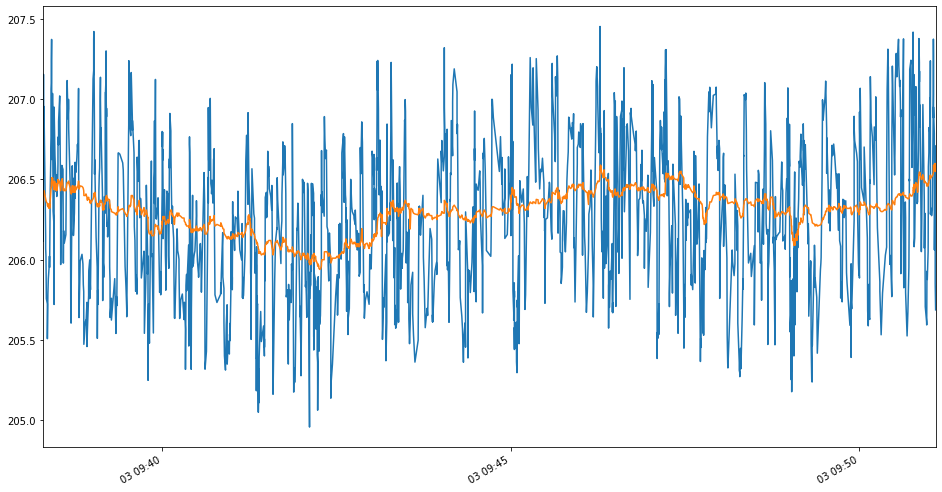

In [113]:
results['fair_value'].plot()
results['market_price'].plot()
plt.show()

## 2. Output

In [114]:
statistical_results = tk.trade_statistics( results )

In [115]:
# P&L Series

intraday_pnl = statistical_results['PNL']
intraday_pnl

,position,unrealized_pnl,realized_pnl
2019-09-03 09:38:17.244698778,1,-0.01,0
2019-09-03 09:38:17.293535447,2,-0.06,0
2019-09-03 09:38:17.311745652,1,-0.0337,-0.03
2019-09-03 09:38:17.511901738,0,-0,-0.06
2019-09-03 09:38:17.596473049,-1,0.02,-0.06
...,...,...,...
2019-09-03 09:51:05.611013099,-93,-25.5729,91.55
2019-09-03 09:51:05.613221350,-94,-27.889,91.55
2019-09-03 09:51:05.614219472,-95,-27.6361,91.55
2019-09-03 09:51:05.614281174,-96,-27.3716,91.55


In [116]:
# max Long, max Short, Ending Position
# Final, Max, Min P&L

for key in list(statistical_results.keys())[1:]:
    print(key , ':' , statistical_results[key])

max_long_Position : 22
max_short_Position : -150
ending_Position : -97
best_unrealized_PNL : 25.278118336434375
worst_unrealized_PNL : -27.88900725702871
total_realized_PNL : 91.54999018074372


## 3. Explore Different Calibrations

## 4. Risk Adjustment